In [11]:
import pandas as pd
import numpy as np
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt

## Concat all csv

In [12]:
PATH_CSV_DIR = '/home/juravlik/PycharmProjects/ssu_artworks/static/data/csv/'

In [13]:
csvs_list = [x for x in os.listdir(PATH_CSV_DIR) if x[0].isupper()]

In [14]:
for i, csv in enumerate(csvs_list):
    
    csv_path = os.path.join(PATH_CSV_DIR, csv)
    
    df = pd.read_csv(csv_path,
                    sep=';')
    
    if i == 0:
        df_all = df
    
    else:
        df_all = pd.concat([df_all, df])

In [15]:
df_all.rename(columns={'imgId': 'filename'}, inplace=True)

In [16]:
df_all

,filename,style
0,jacob-jordaens_the-mission-of-st-peter-1617,Baroque
1,jacob-jordaens_study-of-the-head-of-abraham-gr...,Baroque
2,rembrandt_a-young-woman-at-her-toilet-1633,Baroque
3,bartolome-esteban-murillo_st-isidore-of-sevill...,Baroque
4,frans-snyders_a-fruit-stall-1,Baroque
...,...,...
1338,raphael_the-miraculous-draught-of-fishes-carto...,High_Renaissance
1339,raphael_school-of-athens-detail-from-right-han...,High_Renaissance
1340,titian_vanitas-1515,High_Renaissance
1341,andrea-mantegna_minerva-chasing-the-vices-from...,High_Renaissance


In [17]:
df_all['imgId'] = df_all['style'] + '__' + df_all['filename']

In [18]:
df_all

,filename,style,imgId
0,jacob-jordaens_the-mission-of-st-peter-1617,Baroque,Baroque__jacob-jordaens_the-mission-of-st-pete...
1,jacob-jordaens_study-of-the-head-of-abraham-gr...,Baroque,Baroque__jacob-jordaens_study-of-the-head-of-a...
2,rembrandt_a-young-woman-at-her-toilet-1633,Baroque,Baroque__rembrandt_a-young-woman-at-her-toilet...
3,bartolome-esteban-murillo_st-isidore-of-sevill...,Baroque,Baroque__bartolome-esteban-murillo_st-isidore-...
4,frans-snyders_a-fruit-stall-1,Baroque,Baroque__frans-snyders_a-fruit-stall-1
...,...,...,...
1338,raphael_the-miraculous-draught-of-fishes-carto...,High_Renaissance,High_Renaissance__raphael_the-miraculous-draug...
1339,raphael_school-of-athens-detail-from-right-han...,High_Renaissance,High_Renaissance__raphael_school-of-athens-det...
1340,titian_vanitas-1515,High_Renaissance,High_Renaissance__titian_vanitas-1515
1341,andrea-mantegna_minerva-chasing-the-vices-from...,High_Renaissance,High_Renaissance__andrea-mantegna_minerva-chas...


In [19]:
df_all['author'] = df_all.imgId.apply(lambda x: x.split('__')[-1].split('_')[0])

In [20]:
df_all['author'].nunique()

1119

In [21]:
df_all.groupby(['author']).style.nunique().describe()

count    1119.000000
mean        1.883825
std         1.274105
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        11.000000
Name: style, dtype: float64

In [22]:
df_all['class'] = df_all['style'] + '__' + df_all['author']

In [23]:
df_all

,filename,style,imgId,author,class
0,jacob-jordaens_the-mission-of-st-peter-1617,Baroque,Baroque__jacob-jordaens_the-mission-of-st-pete...,jacob-jordaens,Baroque__jacob-jordaens
1,jacob-jordaens_study-of-the-head-of-abraham-gr...,Baroque,Baroque__jacob-jordaens_study-of-the-head-of-a...,jacob-jordaens,Baroque__jacob-jordaens
2,rembrandt_a-young-woman-at-her-toilet-1633,Baroque,Baroque__rembrandt_a-young-woman-at-her-toilet...,rembrandt,Baroque__rembrandt
3,bartolome-esteban-murillo_st-isidore-of-sevill...,Baroque,Baroque__bartolome-esteban-murillo_st-isidore-...,bartolome-esteban-murillo,Baroque__bartolome-esteban-murillo
4,frans-snyders_a-fruit-stall-1,Baroque,Baroque__frans-snyders_a-fruit-stall-1,frans-snyders,Baroque__frans-snyders
...,...,...,...,...,...
1338,raphael_the-miraculous-draught-of-fishes-carto...,High_Renaissance,High_Renaissance__raphael_the-miraculous-draug...,raphael,High_Renaissance__raphael
1339,raphael_school-of-athens-detail-from-right-han...,High_Renaissance,High_Renaissance__raphael_school-of-athens-det...,raphael,High_Renaissance__raphael
1340,titian_vanitas-1515,High_Renaissance,High_Renaissance__titian_vanitas-1515,titian,High_Renaissance__titian
1341,andrea-mantegna_minerva-chasing-the-vices-from...,High_Renaissance,High_Renaissance__andrea-mantegna_minerva-chas...,andrea-mantegna,High_Renaissance__andrea-mantegna


In [24]:
columns_list = ['imgId', 'style', 'author', 'class']

## Drop some data

In [25]:
df_all.shape[0]

81446

In [26]:
df_all['style'].value_counts()

Impressionism                 13060
Realism                       10733
Romanticism                    7019
Expressionism                  6736
Post_Impressionism             6451
Symbolism                      4528
Art_Nouveau_Modern             4334
Baroque                        4241
Abstract_Expressionism         2782
Northern_Renaissance           2552
Naive_Art_Primitivism          2405
Cubism                         2235
Rococo                         2089
Color_Field_Painting           1615
Pop_Art                        1483
Early_Renaissance              1391
High_Renaissance               1343
Minimalism                     1337
Mannerism_Late_Renaissance     1279
Ukiyo_e                        1167
Fauvism                         934
Pointillism                     513
Contemporary_Realism            481
New_Realism                     314
Synthetic_Cubism                216
Analytical_Cubism               110
Action_painting                  98
Name: style, dtype: int64

In [27]:
df_all['class'].nunique()

2108

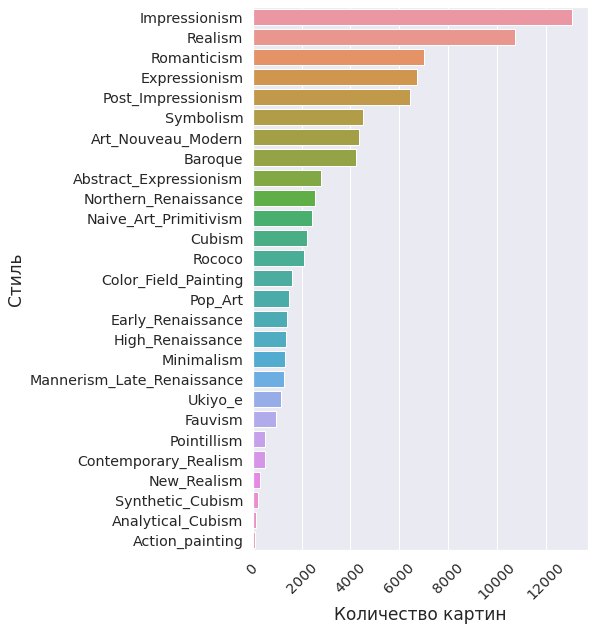

In [28]:
sns.set(font_scale=1.3)
plt.figure(figsize=(6, 10))
sns.barplot(x='style', y='index', data=df_all['style'].value_counts().reset_index())

plt.xticks(rotation=45)
plt.xlabel('Количество картин', fontsize=17);
plt.ylabel('Стиль', fontsize=17);
plt.title('', fontsize=17)
plt.show()

In [29]:
df_all.author.nunique()

1119

In [30]:
df_all['style'].nunique()

27

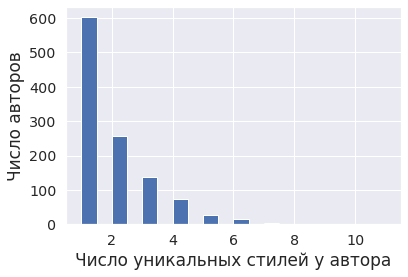

In [31]:
sns.set(font_scale=1.3)

df_all.groupby(['author']).style.nunique().hist(bins=20)
plt.xlabel('Число уникальных стилей у автора', fontsize=17);
plt.ylabel('Число авторов', fontsize=17);
plt.title('', fontsize=17)
plt.show()

In [361]:
df_all = df_all[~df_all['class'].isin(df_all.groupby('class').filter(lambda x: len(x) == 1)['class'])]

In [362]:
df_all['class'].value_counts()

Impressionism__pierre-auguste-renoir         1376
Impressionism__claude-monet                  1320
Symbolism__nicholas-roerich                  1200
Post_Impressionism__vincent-van-gogh         1006
Realism__vincent-van-gogh                     884
                                             ... 
Cubism__hans-richter                            2
Abstract_Expressionism__rufino-tamayo           2
Post_Impressionism__jacoba-van-heemskerck       2
Realism__karoly-ferenczy                        2
Realism__henri-edmond-cross                     2
Name: class, Length: 1925, dtype: int64

In [363]:
df_all.shape[0]

81263

In [364]:
df_all.groupby('class').filter(lambda x: len(x) > 250).shape[0]

23252

In [365]:
df_all.groupby('class').filter(lambda x: len(x) > 250)['class'].nunique() * 250

11500

In [366]:
df_g250 = df_all.groupby('class').filter(lambda x: len(x) > 250)\
.groupby('class').apply(lambda x: x.sample(250, random_state=42)).reset_index(drop=True)

In [367]:
df_all = df_all[~df_all['class'].isin(df_all.groupby('class').filter(lambda x: len(x) > 250)['class'])]

In [368]:
df_g250.shape[0]

11500

In [369]:
df_all = pd.concat([df_all, df_g250])

In [370]:
df_all.reset_index(inplace=True, drop=True)

In [371]:
df_all

,filename,style,imgId,author,class
0,jacob-jordaens_the-mission-of-st-peter-1617,Baroque,Baroque__jacob-jordaens_the-mission-of-st-pete...,jacob-jordaens,Baroque__jacob-jordaens
1,jacob-jordaens_study-of-the-head-of-abraham-gr...,Baroque,Baroque__jacob-jordaens_study-of-the-head-of-a...,jacob-jordaens,Baroque__jacob-jordaens
2,bartolome-esteban-murillo_st-isidore-of-sevill...,Baroque,Baroque__bartolome-esteban-murillo_st-isidore-...,bartolome-esteban-murillo,Baroque__bartolome-esteban-murillo
3,frans-snyders_a-fruit-stall-1,Baroque,Baroque__frans-snyders_a-fruit-stall-1,frans-snyders,Baroque__frans-snyders
4,david-teniers-the-younger_a-smoker-leaning-on-...,Baroque,Baroque__david-teniers-the-younger_a-smoker-le...,david-teniers-the-younger,Baroque__david-teniers-the-younger
...,...,...,...,...,...
69506,utagawa-kuniyoshi_koga-saburo-suspendeding-a-b...,Ukiyo_e,Ukiyo_e__utagawa-kuniyoshi_koga-saburo-suspend...,utagawa-kuniyoshi,Ukiyo_e__utagawa-kuniyoshi
69507,utagawa-kuniyoshi_catfish-1,Ukiyo_e,Ukiyo_e__utagawa-kuniyoshi_catfish-1,utagawa-kuniyoshi,Ukiyo_e__utagawa-kuniyoshi
69508,utagawa-kuniyoshi_nine-tailed-fox-tamamo-no-ma...,Ukiyo_e,Ukiyo_e__utagawa-kuniyoshi_nine-tailed-fox-tam...,utagawa-kuniyoshi,Ukiyo_e__utagawa-kuniyoshi
69509,utagawa-kuniyoshi_at-the-shore-of-the-sumida-r...,Ukiyo_e,Ukiyo_e__utagawa-kuniyoshi_at-the-shore-of-the...,utagawa-kuniyoshi,Ukiyo_e__utagawa-kuniyoshi


In [372]:
df_all['class'].value_counts()

Impressionism__childe-hassam            250
Symbolism__nicholas-roerich             250
Expressionism__ernst-ludwig-kirchner    250
Realism__thomas-eakins                  250
Impressionism__edgar-degas              250
                                       ... 
Expressionism__janos-mattis-teutsch       2
Impressionism__endre-bartos               2
Expressionism__laszlo-moholy-nagy         2
Post_Impressionism__robert-delaunay       2
Impressionism__ivan-vladimirov            2
Name: class, Length: 1925, dtype: int64

In [373]:
df_all[columns_list].to_csv(os.path.join(PATH_CSV_DIR, 'all_after_filter.csv'),
              sep=';', index=False)

## Train test split

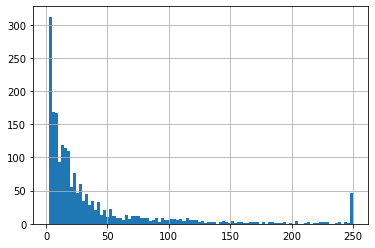

In [58]:
df_all['class'].value_counts().hist(bins=100)

In [59]:
df_all.shape[0]

69511

In [61]:
df_all['style'].nunique()

27

In [376]:
df_valid = df_all.sample(10000, random_state=42)

In [377]:
df_train = df_all[~df_all.index.isin(df_valid.index)]

In [378]:
df_not_in_train = df_valid[~df_valid['class'].isin(df_train['class'])]

In [379]:
df_train = pd.concat([df_train, df_not_in_train])

In [380]:
df_valid = df_valid[~df_valid['class'].isin(df_not_in_train['class'])]

In [381]:
df_train.shape[0] + df_valid.shape[0]

69511

In [382]:
df_all['class'].nunique(), df_train['class'].nunique(), df_valid['class'].nunique()

(1925, 1925, 1533)

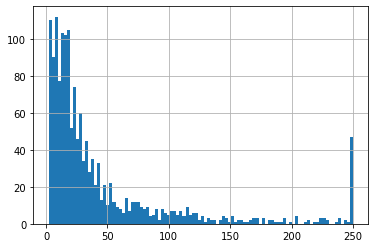

In [383]:
df_all[df_all['class'].isin(df_valid['class'])]['class'].value_counts().hist(bins=100)

In [384]:
df_valid

,filename,style,imgId,author,class
22506,pablo-picasso_two-nude-women-1906,Expressionism,Expressionism__pablo-picasso_two-nude-women-1906,pablo-picasso,Expressionism__pablo-picasso
7732,jean-francois-millet_the-man-with-the-hoe-1862,Realism,Realism__jean-francois-millet_the-man-with-the...,jean-francois-millet,Realism__jean-francois-millet
18600,paul-cezanne_pastoral-or-idyll-1870,Romanticism,Romanticism__paul-cezanne_pastoral-or-idyll-1870,paul-cezanne,Romanticism__paul-cezanne
29780,federico-zandomeneghi_figure-of-man-sitting,Impressionism,Impressionism__federico-zandomeneghi_figure-of...,federico-zandomeneghi,Impressionism__federico-zandomeneghi
43277,paul-gauguin_still-life-with-cherries-1886,Post_Impressionism,Post_Impressionism__paul-gauguin_still-life-wi...,paul-gauguin,Post_Impressionism__paul-gauguin
...,...,...,...,...,...
588,alonzo-cano_noli-me-tangere,Baroque,Baroque__alonzo-cano_noli-me-tangere,alonzo-cano,Baroque__alonzo-cano
48399,frank-stella_sinjerli-variations-iia-1977,Color_Field_Painting,Color_Field_Painting__frank-stella_sinjerli-va...,frank-stella,Color_Field_Painting__frank-stella
64832,camille-corot_the-bay-of-somme,Realism,Realism__camille-corot_the-bay-of-somme,camille-corot,Realism__camille-corot
55400,masaccio_portrait-of-a-young-woman-1425,Early_Renaissance,Early_Renaissance__masaccio_portrait-of-a-youn...,masaccio,Early_Renaissance__masaccio


In [385]:
df_train[columns_list].to_csv(os.path.join(PATH_CSV_DIR, 'train.csv'),
              sep=';', index=False)

In [386]:
df_valid[columns_list].to_csv(os.path.join(PATH_CSV_DIR, 'valid.csv'),
              sep=';', index=False)

# Change meta data

In [1]:
df_train = pd.read_csv(os.path.join(PATH_CSV_DIR, 'train.csv'),
                       sep=';')

df_valid = pd.read_csv(os.path.join(PATH_CSV_DIR, 'valid.csv'),
                       sep=';')

NameError: name 'pd' is not defined

In [12]:
def change_name(name: str) -> str:
    name_split = name.split('-')
    
    new_name = ''
    
    for i, s in enumerate(name_split):
        if i > 0:
            new_name += ' '
            
        new_name += s[0].upper() + s[1:]
    
    return new_name
        
    
df_train['author'] = df_train.author.apply(lambda x: change_name(x))
df_valid['author'] = df_valid.author.apply(lambda x: change_name(x))

In [13]:
df_train

,imgId,style,author,class
0,Baroque__jacob-jordaens_the-mission-of-st-pete...,Baroque,Jacob Jordaens,Baroque__jacob-jordaens
1,Baroque__jacob-jordaens_study-of-the-head-of-a...,Baroque,Jacob Jordaens,Baroque__jacob-jordaens
2,Baroque__bartolome-esteban-murillo_st-isidore-...,Baroque,Bartolome Esteban Murillo,Baroque__bartolome-esteban-murillo
3,Baroque__frans-snyders_a-fruit-stall-1,Baroque,Frans Snyders,Baroque__frans-snyders
4,Baroque__david-teniers-the-younger_a-smoker-le...,Baroque,David Teniers The Younger,Baroque__david-teniers-the-younger
...,...,...,...,...
59515,Impressionism__burhan-dogancay_old-ankara-1958,Impressionism,Burhan Dogancay,Impressionism__burhan-dogancay
59516,Fauvism__natalia-goncharova_self-portrait-with...,Fauvism,Natalia Goncharova,Fauvism__natalia-goncharova
59517,Abstract_Expressionism__roberto-matta_to-give-...,Abstract_Expressionism,Roberto Matta,Abstract_Expressionism__roberto-matta
59518,Abstract_Expressionism__roberto-matta_redness-...,Abstract_Expressionism,Roberto Matta,Abstract_Expressionism__roberto-matta


In [14]:
df_train[columns_list].to_csv(os.path.join(PATH_CSV_DIR, 'train.csv'),
              sep=';', index=False)

df_valid[columns_list].to_csv(os.path.join(PATH_CSV_DIR, 'valid.csv'),
              sep=';', index=False)

In [19]:
df_valid.sample(20).imgId.value_counts()

Impressionism__konstantin-korovin_cafe-in-yalta-1905                               1
Baroque__bartolome-esteban-murillo_francis-xavier-1670                             1
Baroque__anthony-van-dyck_queen-henrietta-maria-1635                               1
Post_Impressionism__grace-cossington-smith_strike-1917                             1
Early_Renaissance__antonello-da-messina_portrait-of-a-man-1470                     1
Impressionism__konstantin-makovsky_woman-head-portrait-of-e-kovaliova              1
Baroque__frans-hals_portrait-of-a-man-8                                            1
Post_Impressionism__walter-sickert_lady-martin-1935                                1
Realism__pavel-fedotov_get-married-gentlemen-that-would-come-in-very-handy         1
Early_Renaissance__sandro-botticelli_madonna-of-the-magnificat-1481(1)             1
Expressionism__max-pechstein_the-masked-woman-1910                                 1
Realism__camille-corot_young-girl-learning-to-write              

# Create index set and test set

In [47]:
df_train

,imgId,style,author,class
0,Baroque__jacob-jordaens_the-mission-of-st-pete...,Baroque,Jacob Jordaens,Baroque__jacob-jordaens
1,Baroque__jacob-jordaens_study-of-the-head-of-a...,Baroque,Jacob Jordaens,Baroque__jacob-jordaens
2,Baroque__bartolome-esteban-murillo_st-isidore-...,Baroque,Bartolome Esteban Murillo,Baroque__bartolome-esteban-murillo
3,Baroque__frans-snyders_a-fruit-stall-1,Baroque,Frans Snyders,Baroque__frans-snyders
4,Baroque__david-teniers-the-younger_a-smoker-le...,Baroque,David Teniers The Younger,Baroque__david-teniers-the-younger
...,...,...,...,...
59515,Impressionism__burhan-dogancay_old-ankara-1958,Impressionism,Burhan Dogancay,Impressionism__burhan-dogancay
59516,Fauvism__natalia-goncharova_self-portrait-with...,Fauvism,Natalia Goncharova,Fauvism__natalia-goncharova
59517,Abstract_Expressionism__roberto-matta_to-give-...,Abstract_Expressionism,Roberto Matta,Abstract_Expressionism__roberto-matta
59518,Abstract_Expressionism__roberto-matta_redness-...,Abstract_Expressionism,Roberto Matta,Abstract_Expressionism__roberto-matta


In [48]:
df_valid

,imgId,style,author,class
0,Expressionism__pablo-picasso_two-nude-women-1906,Expressionism,Pablo Picasso,Expressionism__pablo-picasso
1,Realism__jean-francois-millet_the-man-with-the...,Realism,Jean Francois Millet,Realism__jean-francois-millet
2,Romanticism__paul-cezanne_pastoral-or-idyll-1870,Romanticism,Paul Cezanne,Romanticism__paul-cezanne
3,Impressionism__federico-zandomeneghi_figure-of...,Impressionism,Federico Zandomeneghi,Impressionism__federico-zandomeneghi
4,Post_Impressionism__paul-gauguin_still-life-wi...,Post_Impressionism,Paul Gauguin,Post_Impressionism__paul-gauguin
...,...,...,...,...
9986,Baroque__alonzo-cano_noli-me-tangere,Baroque,Alonzo Cano,Baroque__alonzo-cano
9987,Color_Field_Painting__frank-stella_sinjerli-va...,Color_Field_Painting,Frank Stella,Color_Field_Painting__frank-stella
9988,Realism__camille-corot_the-bay-of-somme,Realism,Camille Corot,Realism__camille-corot
9989,Early_Renaissance__masaccio_portrait-of-a-youn...,Early_Renaissance,Masaccio,Early_Renaissance__masaccio


In [49]:
df_all = pd.concat([df_train, df_valid])

df_all.reset_index(inplace=True, drop=True)

In [50]:
df_all['style'].value_counts()

Impressionism                 8914
Realism                       8670
Expressionism                 6447
Romanticism                   6042
Post_Impressionism            5481
Art_Nouveau_Modern            3768
Baroque                       3585
Symbolism                     3447
Abstract_Expressionism        2754
Cubism                        2214
Rococo                        2089
Naive_Art_Primitivism         1993
Northern_Renaissance          1973
Color_Field_Painting          1603
Pop_Art                       1473
Early_Renaissance             1390
High_Renaissance              1343
Minimalism                    1323
Mannerism_Late_Renaissance    1279
Ukiyo_e                       1083
Fauvism                        917
Pointillism                    508
Contemporary_Realism           480
New_Realism                    314
Synthetic_Cubism               215
Analytical_Cubism              110
Action_painting                 96
Name: style, dtype: int64

In [51]:
df_test = df_all[~df_all['style'].isin(['Action_painting', 'Analytical_Cubism'])].groupby('style') \
.apply(lambda x: x.sample(7, random_state=42)).reset_index(drop=True)

In [52]:
df_index = df_all[~df_all.imgId.isin(df_test.imgId)]

In [53]:
df_index.shape[0] + df_test.shape[0]

69511

In [54]:
df_index[columns_list].to_csv(os.path.join(PATH_CSV_DIR, 'index.csv'),
              sep=';', index=False)

df_test[columns_list].to_csv(os.path.join(PATH_CSV_DIR, 'test.csv'),
              sep=';', index=False)

In [1]:
df_test.imgId.value_counts()

NameError: name 'df_test' is not defined

## Check test

In [3]:
df_test = pd.read_csv(os.path.join(PATH_CSV_DIR, 'test.csv'),
                       sep=';')

In [5]:
df_train = pd.read_csv(os.path.join(PATH_CSV_DIR, 'train.csv'),
                       sep=';')

In [10]:
df_train[df_train.imgId == 'Baroque__pietro-da-cortona_romulus-and-remus-given-shelter-by-faustulus']

,imgId,style,author,class
39,Baroque__pietro-da-cortona_romulus-and-remus-g...,Baroque,Pietro Da Cortona,Baroque__pietro-da-cortona


In [4]:
df_test.sample(30, random_state=1).imgId.value_counts()

Realism__boris-kustodiev_interior-the-female-figure-at-the-window-in-studio-1920                         1
Northern_Renaissance__hans-holbein-the-younger_portrait-of-a-young-man                                   1
Contemporary_Realism__richard-whitney_robert-reich                                                       1
Romanticism__ivan-aivazovsky_before-battle-ship-constantinople-1872                                      1
Baroque__peter-paul-rubens_portrait-of-george-villiers-1st-duke-of-buckingham                            1
Pop_Art__burhan-dogancay_the-circumciser-1990                                                            1
Early_Renaissance__fra-angelico_sacred-conversation-1443                                                 1
Minimalism__imi-knoebel_venera-1996                                                                      1
Contemporary_Realism__neil-welliver_study-for-blue-ducktrap                                              1
Abstract_Expressionism__sam-francis_u